# Numerical Summaries

## Measures of center

### County demographics

In [8]:
library(dplyr)
library(ggplot2)

In [12]:
# Load the dataset named life
life <- read.csv("https://assets.datacamp.com/production/course_1796/datasets/life_exp_raw.csv")

# Check the life dataset
glimpse(life)

Observations: 81,691
Variables: 10
$ State                                    <fctr> Alabama, Alabama, Alabama...
$ County                                   <fctr> Autauga County, Baldwin C...
$ fips                                     <int> 1001, 1003, 1005, 1007, 10...
$ Year                                     <int> 1985, 1985, 1985, 1985, 19...
$ Female.life.expectancy..years.           <dbl> 77.02, 78.84, 76.04, 76.62...
$ Female.life.expectancy..national..years. <dbl> 77.79, 77.79, 77.79, 77.79...
$ Female.life.expectancy..state..years.    <dbl> 76.9, 76.9, 76.9, 76.9, 76...
$ Male.life.expectancy..years.             <dbl> 68.13, 71.14, 66.83, 67.34...
$ Male.life.expectancy..national..years.   <dbl> 70.85, 70.85, 70.85, 70.85...
$ Male.life.expectancy..state..years.      <dbl> 69.06, 69.06, 69.06, 69.06...


### Center: mean, median

* Mean: A balance point of the data. It can be affected by outliers easily.
* Median: The value in the middle when the data are sorted in order
* Mode: The most frequently observed value(s) in the data

In [19]:
names(life)

[1] "State"                                   
 [2] "County"                                  
 [3] "fips"                                    
 [4] "Year"                                    
 [5] "Female.life.expectancy..years."          
 [6] "Female.life.expectancy..national..years."
 [7] "Female.life.expectancy..state..years."   
 [8] "Male.life.expectancy..years."            
 [9] "Male.life.expectancy..national..years."  
[10] "Male.life.expectancy..state..years."

In [20]:
x <- head(round(life$Female.life.expectancy..years.), 11)
x

# Using the formula to calculate mean
sum(x) / 11

# Using mean() function
mean(x)


# How to find median: the number in the middle when sorted in order
# Check the data
x

# Sort the data in ascending order
sort(x)

# Compare with the reuslt of median() function
median(x)


# How to find mode
# Make a frequency table and check the frequency
table(x)

[1] 77 79 76 77 79 75 77 77 77 78 77

[1] 77.18182

[1] 77.18182

[1] 77 79 76 77 79 75 77 77 77 78 77

[1] 75 76 77 77 77 77 77 77 78 79 79

[1] 77

x
75 76 77 78 79 
 1  1  6  1  2 

### Groupwise means

In [21]:
life %>%
    mutate(west_coast = State %in% c("California", "Oregon", "Washington")) %>%
    group_by(west_coast) %>%
    summarise(mean(Female.life.expectancy..years.),
             median(Female.life.expectancy..years.))

west_coast,mean(Female.life.expectancy..years.),median(Female.life.expectancy..years.)
FALSE,78.74307,78.82
TRUE,79.57937,79.48


### group_by() function

* Allows us to check the result by certain groups

In [24]:
# See what the data look like
life[240:247, ]

# Check the mean of them without group_by()
life %>%
    slice(240:247) %>%
    summarise(mean(Female.life.expectancy..years.))

# # Check the mean of them with group_by()
life %>%
    slice(240:247) %>%
    mutate(west_cost = State %in% c("California", "Oregon", "Washington")) %>%
    group_by(west_cost) %>%
    summarise(mean(Female.life.expectancy..years.))


,State,County,fips,Year,Female.life.expectancy..years.,Female.life.expectancy..national..years.,Female.life.expectancy..state..years.,Male.life.expectancy..years.,Male.life.expectancy..national..years.,Male.life.expectancy..state..years.
240,California,Ventura County,6111,1985,79.71,77.79,78.26,73.78,70.85,71.74
241,California,Yolo County,6113,1985,77.68,77.79,78.26,71.36,70.85,71.74
242,California,Yuba County,6115,1985,76.19,77.79,78.26,69.60,70.85,71.74
243,COLORADO,ADAMS,8001,1985,79.36,77.79,79.04,73.49,70.85,72.91
244,Colorado,Alamosa County,8003,1985,79.16,77.79,79.04,73.00,70.85,72.91
245,Colorado,Arapahoe County,8005,1985,79.54,77.79,79.04,74.27,70.85,72.91
246,Colorado,Archuleta County,8007,1985,79.75,77.79,79.04,72.69,70.85,72.91
247,Colorado,Baca County,8009,1985,78.95,77.79,79.04,71.80,70.85,72.91


mean(Female.life.expectancy..years.)
78.7925


west_cost,mean(Female.life.expectancy..years.)
FALSE,79.352
TRUE,77.860


### Calculate center measures

Throughout this chapter, you will use data from gapminder, which tracks demographic data in countries of the world over time. To learn more about it, you can bring up the help file with ?gapminder.

For this exercise, focus on how the life expectancy differs from continent to continent. This requires that you conduct your analysis not at the country level, but aggregated up to the continent level. This is made possible by the one-two punch of group_by() and summarize(), a very powerful syntax for carrying out the same analysis on different subsets of the full dataset.

INSTRUCTIONS

* Create a dataset called gap2007 that contains only data from the year 2007.
* Using gap2007, calculate the mean and median life expectancy for each continent. Don't worry about naming the new columns produced by summarize().
* Confirm the trends that you see in the medians by generating side-by-side box plots of life expectancy for each continent.

In [27]:
# Load gapminder library
library(gapminder)

# Check the summary of the dataset
glimpse(gapminder)

Observations: 1,704
Variables: 6
$ country   <fctr> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgh...
$ continent <fctr> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, As...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


continent,mean(lifeExp),median(lifeExp)
Africa,54.80604,52.9265
Americas,73.60812,72.8990
Asia,70.72848,72.3960
Europe,77.64860,78.6085
Oceania,80.71950,80.7195


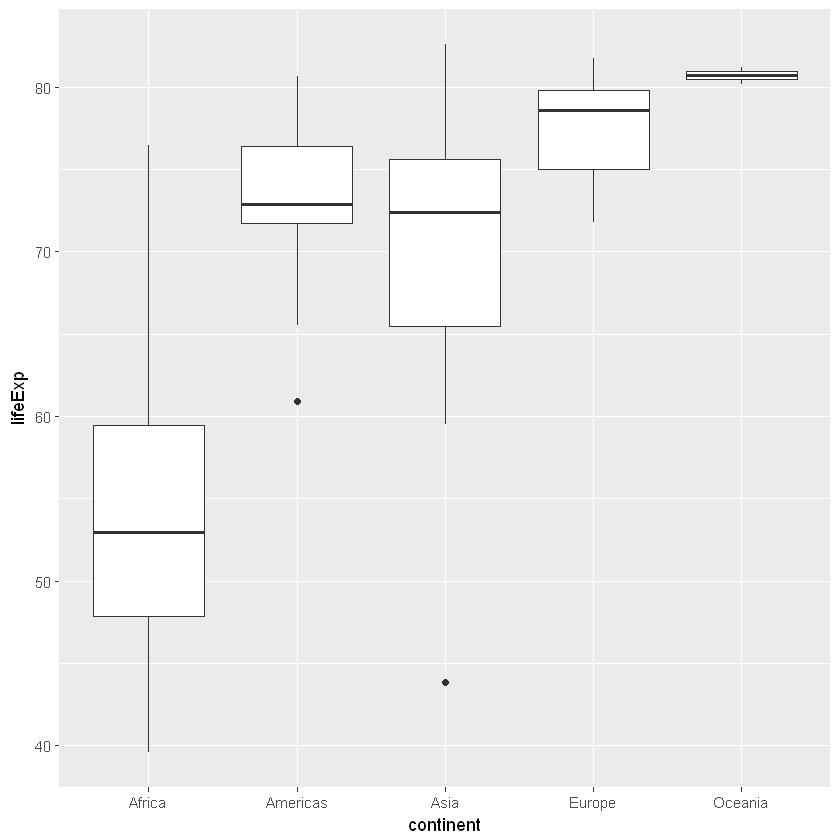

In [28]:
# Create dataset of 2007 data
gap2007 <- filter(gapminder, year == 2007)

# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp),
            median(lifeExp))

# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

## Measure of variability

### Variance

* In probability theory and statistics, **variacne** is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value.

$Var(X) = E[(X - \mu)^2]$

$ Var(X) = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2 $ 


### Standard deviation

* In statistics, the **standard deviation** is a measure that is used to quantify the amount of variation or dispersion of as set of data values. 

* The standard deviation of a random variable, statistical population, data set, or probability distribution is the square root of its variacne.

$ s = \sqrt{\frac{\sum_{i = 1}^N (x_i - \bar{x})^2}{N - 1}} $

### Inter-Quartile Range

* The difference between the 3rd Quartile and the 1st Quartile

### Range

* The difference between the maximum value and the minimum value

### Caution

* When there are extreme values or the data set is heavily skewed, variance, standard deviation and range are easily affected. So, be careful of using them in those situations.
* IQR is not much influenced in those cases.

In [30]:
# Check the dataset
x

# Check the deviation of each data from the mean
x - mean(x)

# Sum up the deviations to find a single value to represent the vairablity
#     - The positive and negative values cancel each others out.
sum(x - mean(x))

# Take squares to each deviations and sum up
#     - It's not close to zero, but it keeps growing as the size of data gets bigger
sum((x - mean(x)) ^ 2)

# Variance
# Divide the value by the size of the data set
n <- length(x)
sum((x - mean(x)) ^ 2) / n

# If you divide the value by n - 1, you will get the sample variance
sum((x - mean(x)) ^ 2) / (n - 1)

# The same job can be done by using var() function: Variance
var(x)

# Standard deviation: The unit is the same as the original unit
sd(x)

# IQR: Inter-Quartile Range
IQR(x)

# Range
range(x)
diff(range(x))


[1] 77 79 76 77 79 75 77 77 77 78 77

[1] -0.1818182  1.8181818 -1.1818182 -0.1818182  1.8181818 -2.1818182
 [7] -0.1818182 -0.1818182 -0.1818182  0.8181818 -0.1818182

[1] -5.684342e-14

[1] 13.63636

[1] 1.239669

[1] 1.363636

[1] 1.363636

[1] 1.167748

[1] 0.5

[1] 75 79

[1] 4

### Calculate spread measures

Let's extend the powerful group_by() and summarize() syntax to measures of spread. If you're unsure whether you're working with symmetric or skewed distributions, it's a good idea to consider a robust measure like IQR in addition to the usual measures of variance or standard deviation.

INSTRUCTIONS

* The gap2007 dataset that you created in an earlier exercise is available in your workspace.

    - For each continent in gap2007, summarize life expectancies using the sd(), the IQR(), and the count of countries, n(). No need to name the new columns produced here. The n() function within your summarize() call does not take any arguments.
    - Graphically compare the spread of these distributions by constructing overlaid density plots of life expectancy broken down by continent.

continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.6307807,11.61025,52
Americas,4.4409476,4.63200,25
Asia,7.9637245,10.15200,33
Europe,2.9798127,4.78250,30
Oceania,0.7290271,0.51550,2


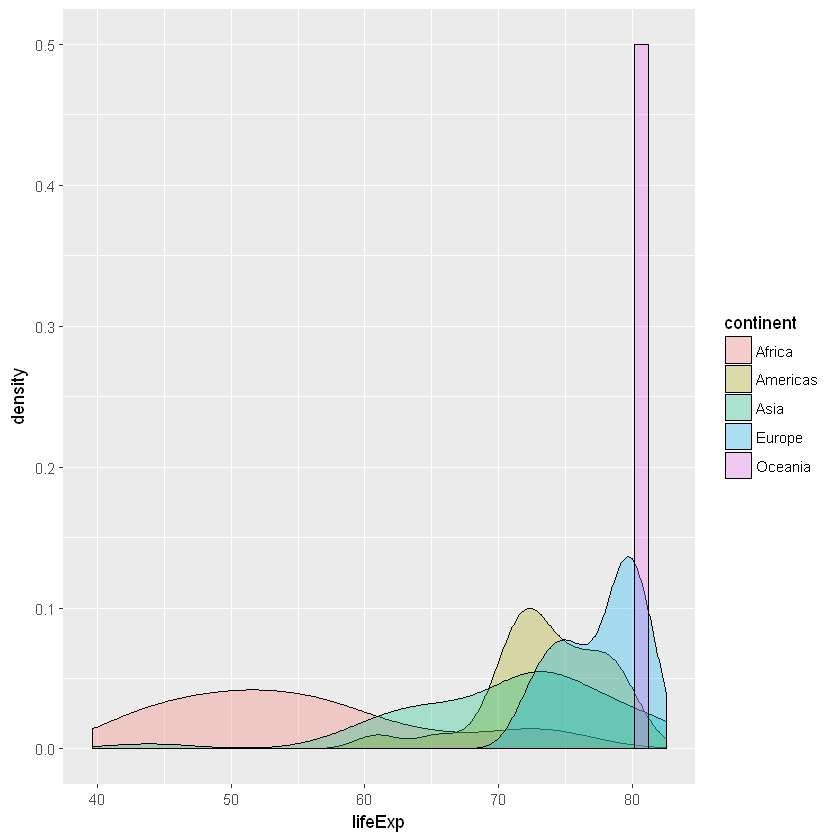

In [31]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

### Choose measures for center and spread

Consider the density plots shown here. What are the most appropriate measures to describe their centers and spreads? In this exercise, you'll select the measures and then calculate them.

INSTRUCTIONS

* Using the shapes of the density plots, calculate the most appropriate measures of center and spread for the following:

    - The distribution of life expectancy in the countries of the Americas. Note you'll need to apply a filter here.
    - The distribution of country populations across the entire gap2007 dataset.

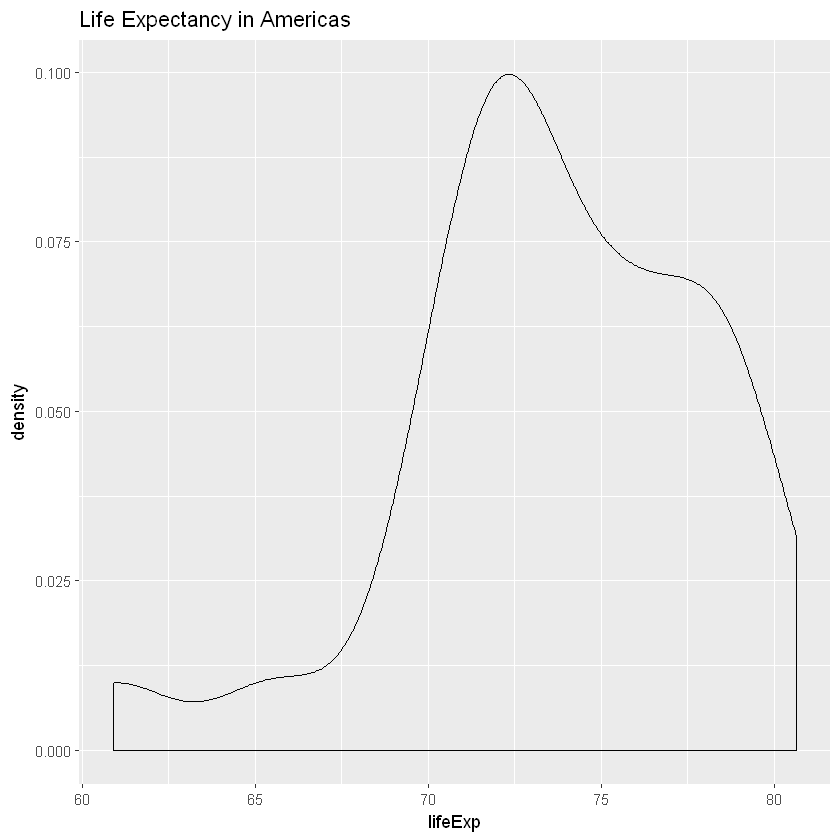

mean(lifeExp),sd(lifeExp)
73.60812,4.440948


median(pop),IQR(pop)
10517531,26702008


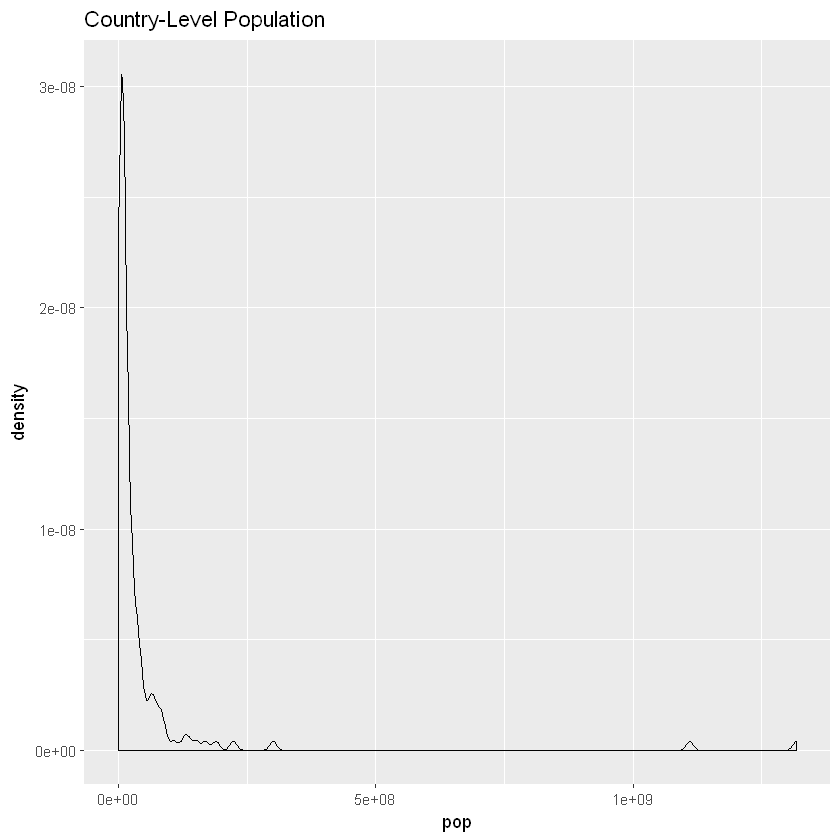

In [38]:
# Density plot of Life Expectancy in Americas
gap2007 %>%
    filter(continent == "Americas") %>%
    ggplot(aes(x = lifeExp)) +
    geom_density() +
    ggtitle("Life Expectancy in Americas")
    
# Density plot of Country-Level Population
gap2007 %>%
    ggplot(aes(x = pop)) +
    geom_density() +
    ggtitle("Country-Level Population")

# Compute stats for lifeExp in Americas
gap2007 %>%
    filter(continent == "Americas") %>%
    summarize(mean(lifeExp),
              sd(lifeExp))

# Compute stats for population
gap2007 %>%
    summarize(median(pop),
              IQR(pop))

## Shape and transformations

### Modality

* The modality of a distribution is the number of prominent humps that show up in the distribution.
    - Unimodal: One mode
    - Bimodal: Two modes
    - Multimodal: Multiple numbers of modes
    - Uniform: No mode, the distribution is flat across all values

### Skewness

* Right-skewed: A distribution has a long tail that stretches out to the righ
* Left-skewed: A distribution has a log tail that stretches out to the left
* Symmetric: If neither tail is longer than the ohter

### Transformation

Highly skewed distributions can make it very difficult to learn anything from a visualization. Transformations can be helpful in revealing the more subtle structure.

Here you'll focus on the population variable, which exhibits strong right skew, and transform it with the natural logarithm function (log() in R).

INSTRUCTIONS

* Using the gap2007 data:

    - Create a density plot of the population variable.
    - Mutate a new column called log_pop that is the natural log of the population and save it back into gap2007.
    - Create a density plot of your transformed variable.

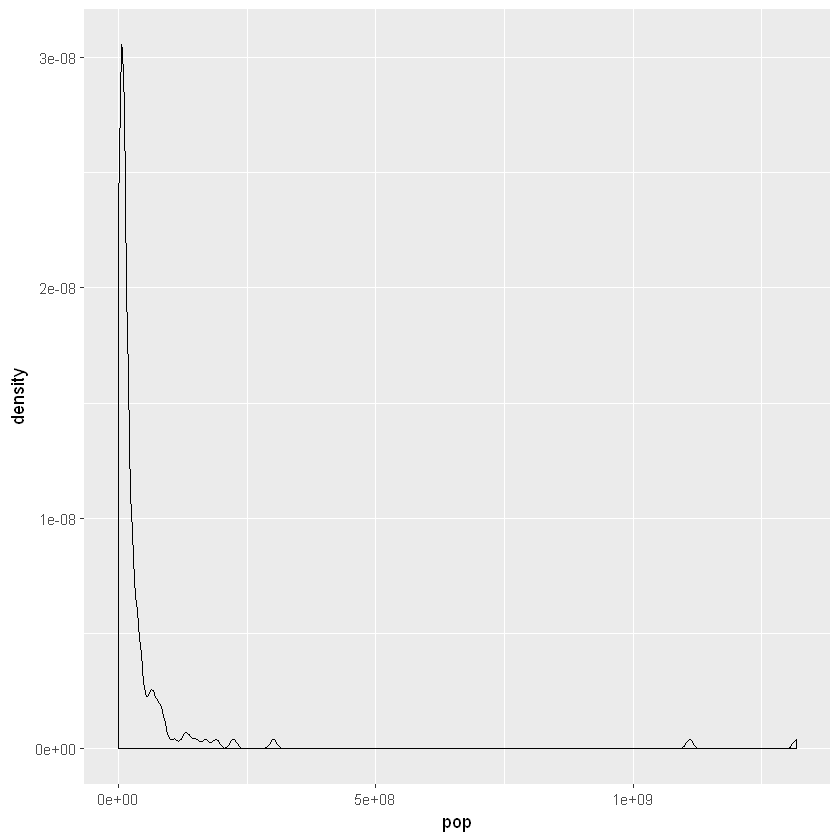

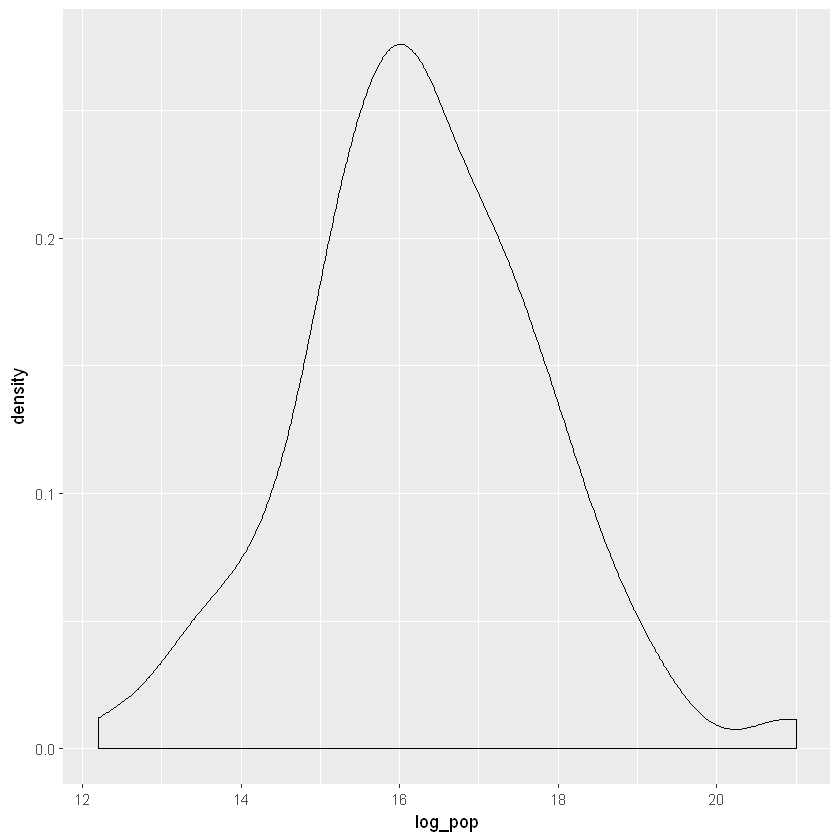

In [44]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()

## Outliers

### Characteristics of a distribution

* Center: mean, median, mode
* Variability: variance, standard deviation
* Shape: modality, skewness
* Outliers: Observations that have extreme values far from the bulk of the distribution

### Indicating outliers

* Set a treshold and mark the outliers

```
life <- life %>%
            mutate(is_outlier = income > 75000)
            filter(is_outlier) %>%
            arrange(desc(income))
```

### Plotting without outliers

```
life %>%
    filter(!is_outlier) %>%
    ggplot(aes(x = income, fill = west_coast)) +
    geom_density(alpha = 0.3)
```

### Identify outliers

Consider the distribution, shown here, of the life expectancies of the countries in Asia. The box plot identifies one clear outlier: a country with a notably low life expectancy. Do you have a guess as to which country this might be? Test your guess in the console using either min() or filter(), then proceed to building a plot with that country removed.

INSTRUCTIONS

* gap2007 is still available in your workspace.

    - Apply a filter so that it only contains observations from Asia, then create a new variable called is_outlier that is TRUE for countries with life expectancy less than 50. Assign the result to gap_asia.
    - Filter gap_asia to remove all outliers, then create another box plot of the remaining life expectancies.

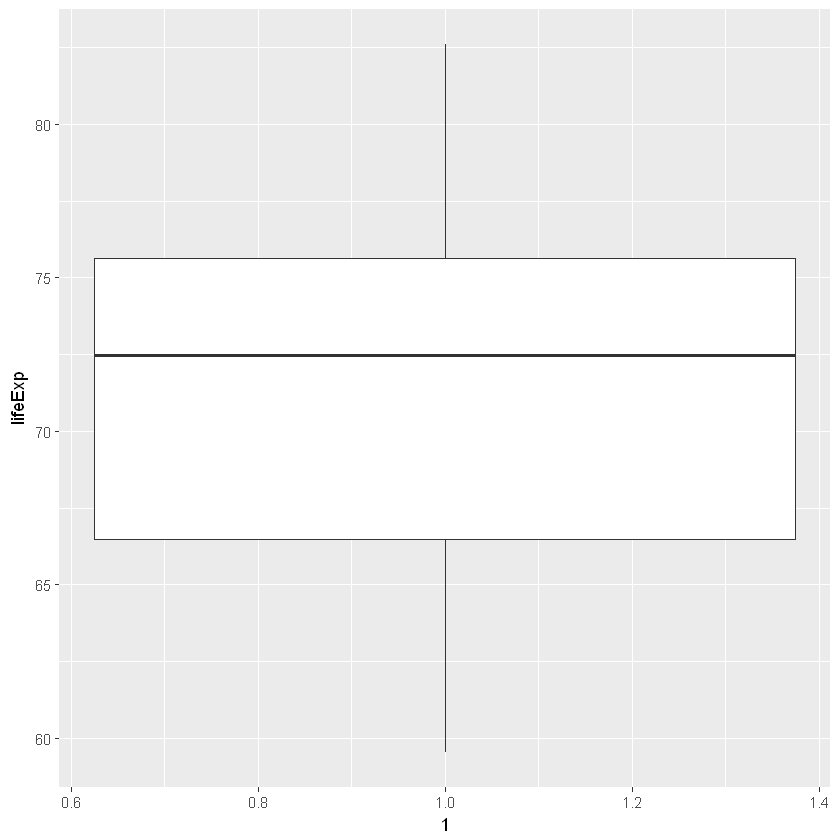

In [46]:
# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
                filter(continent == "Asia") %>%
                mutate(is_outlier = lifeExp < 50)


# Remove outliers, create box plot of lifeExp
gap_asia %>%
    filter(!is_outlier) %>%
    ggplot(aes(x = 1, y = lifeExp)) +
    geom_boxplot()